# CSE 152: Intro to Computer Vision - Winter 2020 Assignment 2
## Instructor: David Kriegman
### Assignment published on Monday, February 3, 2020
### Due on Friday, February 14, 2019 at 11:59pm

## Instructions
* This assignment must be completed individually. Review the academic integrity and collaboration policies on the course website.
* All solutions should be written in this notebook.
* If you want to modify the skeleton code, you may do so. It has been merely been provided as a framework for your solution.
* You may use Python packages for basic linear algebra (e.g. NumPy or SciPy for basic operations), but you may not use packages that directly solve the problem. If you are unsure about using a specific package or function, ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF. You must also submit this notebook as an `.ipynb` file. Submit both files (`.pdf` and `.ipynb`) on Gradescope. **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late policy:** a penalty of 10% per day after the due date.

---

## Problem 1: Stereo and Disparity [10 pts]
Consider two calibrated cameras whose (virtual) image planes are the z=1 plane, and whose focal points are at (-20, 0, 0) and (20, 0, 0). We''ll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-20, 0, 1) in world coordinates, while if (u, v) = (0, 0) this is the point (20, 0, 1).![Fig1.png](fig/fig1.png)
a) Suppose the points (x, y) = (12, 12) is matched to the point (u, v) = (1, 12). What is the 3D location of this point? What is the E matrix linking from Camera 1 to Camera 2? (6pts)

Ans: $P = [\frac{13}{2}, 12, 1, -\frac{11}{40}]^T$

$E = \begin{bmatrix}
{0} & {0} & {0} \\
{0} & {0} & {-40} \\
{0} & {40} & {0} \\
\end{bmatrix}$

b)**EXTRA CREDIT** : Now assume the same setup as before with the same matched points. However Camera 2 is rotated about its center such that it makes an angle of 45 degrees with the +ve x axis. Compute the 3D Location of the point under this assumption, if possible or show why this is not possible. Also compute the E matrix again. (3pts)

c) Suppose two calibrated cameras fixate on a point $P$ (see the figure below) in space such that their principal axes (the line passing the optical center and along the viewing direction) intersect at that point. Show that if the image coordinates are normalized so that the coordinate origin $(0,0)$ concides with the principal point (the intersection between the principal axes and the image plane), then the $\mathbf{E}_{33}$ element of the fundamental matrix is zero.(4pts)

Ans: Due to the nature of the matrix multiplication, you must have a zero at that particular spot in order to get the origin

![Fig2.png](fig2.png)

## Problem 2: Sparse Stereo Matching [25 pts]

In this problem we will play around with sparse stereo matching methods. You will work on two image pairs, a warrior figure and a figure from the Matrix movies. These files both contain two images, two camera matrices, and associated sets of corresponding points (extracted by manually clicking the images). 

For the problems below, you will complete functions to demonstrate results on warrior image pairs (warrior1.png, warrior2.png). In all cases, you should apply the same procedures on the matrix image pair (matrix1.png, matrix2.png) as well. (Provide the same thing for BOTH matrix and warrior.) Note that the matrix image pair is harder, in the sense that matching algorithms will not work quite as well on it. You should expect good results, however, on warrior.

### Corner Detection [3pts]

For this part, we will be using the pre implemented Shi Tomasi corner detector available in OpenCV (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html). Make sure to use the exact same version of OpenCV that you used in the previous HW.  
In this section you are required to pass the parameters required for corner detection(more information can be found in the link above), and
call the OpenCV function which computes the corners and return it as a nice numpy matrix.
Example Output:
![dinoCorner1](fig/dinoCorner1.png)
![dinoCorner2](fig/dinoCorner2.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [3]:
def corner_detect(image, nCorners,qualLevel, minDist):
    """Detect corners on a given image using OpenCV.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        qualLevel: Quality Level below which corners are detected
        minDist: Min Euclidean distance between detected corners.

    Returns:
        Detected corners (in image coordinate) in a numpy array (nx2).
    """
    '''
    Call the OpenCV implementation of the Shi Tomasi Corner Detector
    and return the corners. Be wary of the shape returned by the
    function. Make sure you are returning a numpy matrix of nx2 dim.
    1) The output of the opencv function will be a nump array of nx1x2
    To reshape this to a nx2 mtx use .reshape((n,2)) on the matrix
    2) The opencv implementation accepts numpy matrices of data type
    np.uint8. To convert matrix m to this use, m.astype(np.uint8)
    3) Make sure the image is grey scale and is a 2-d image. Use the
    function rgb2gray.
    '''
    assert type(image) == np.ndarray
    assert image.ndim == 2
    assert 0 < qualLevel < 1
    assert minDist > 0
    
    middle = cv2.goodFeaturesToTrack(image.astype(np.uint8), nCorners, qualLevel, minDist)
    middle = middle.reshape((len(middle), 2))
    
    corners = middle
    return corners

In [4]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=36, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=36, edgecolors='r', facecolors='none')
    plt.show()

Quality Level: 0.01


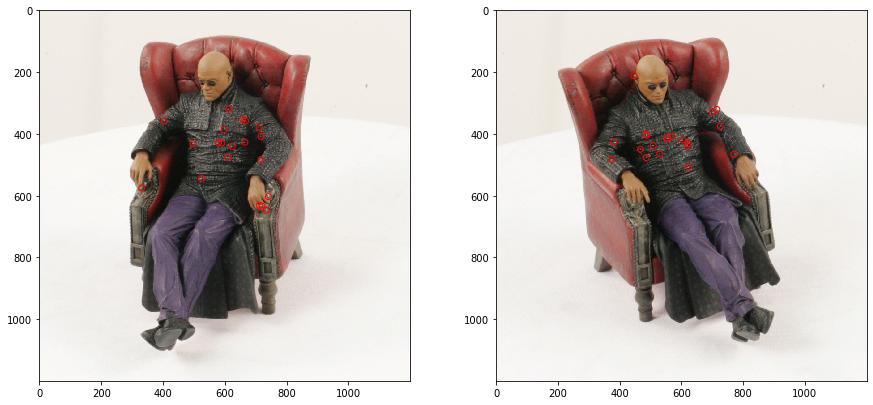

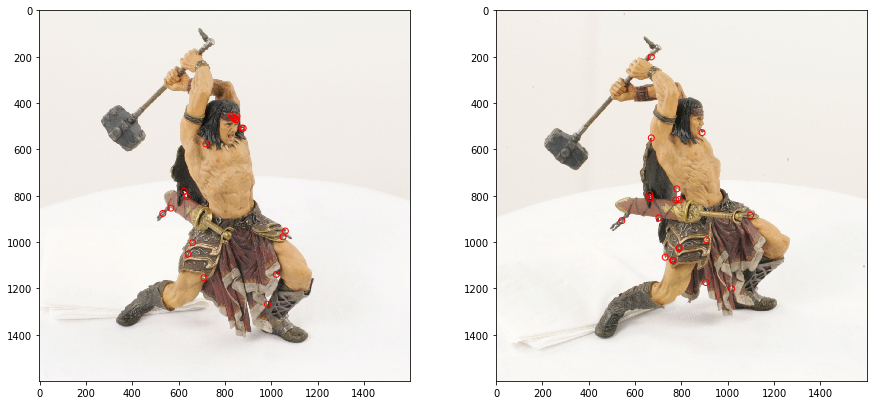

Quality Level: 0.1


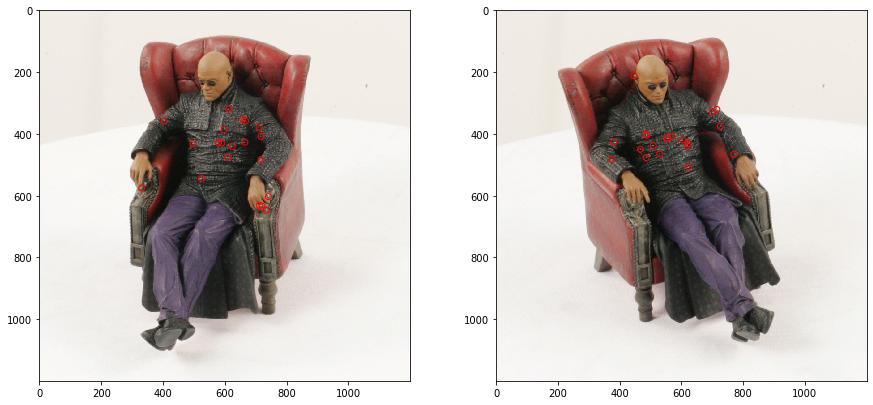

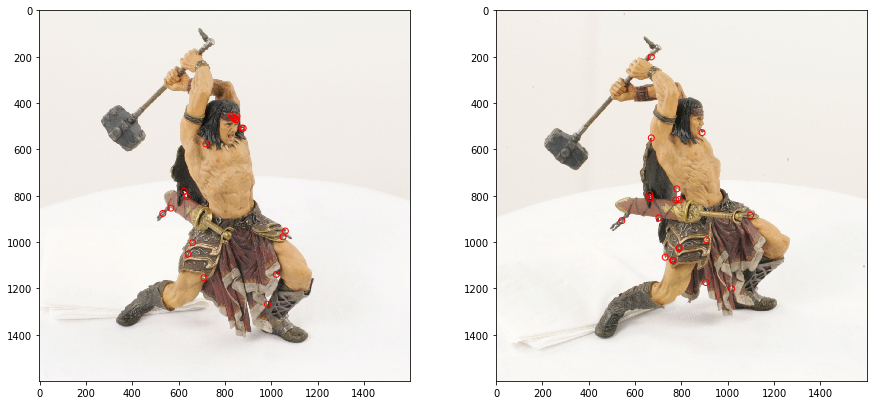

Quality Level: 0.2


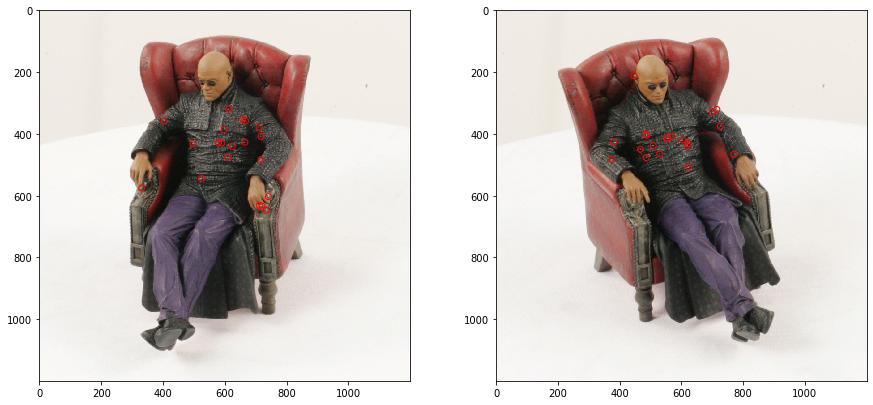

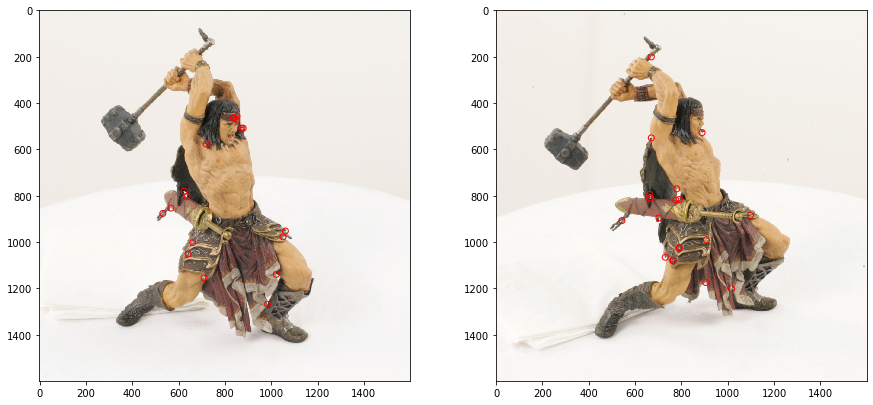

Quality Level: 0.3


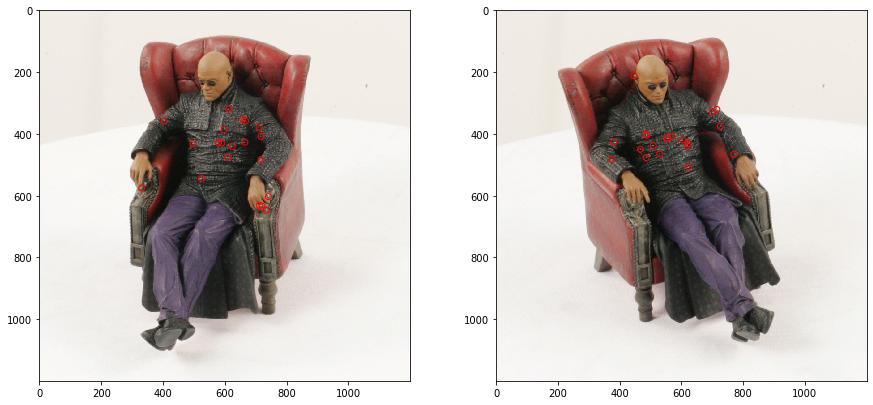

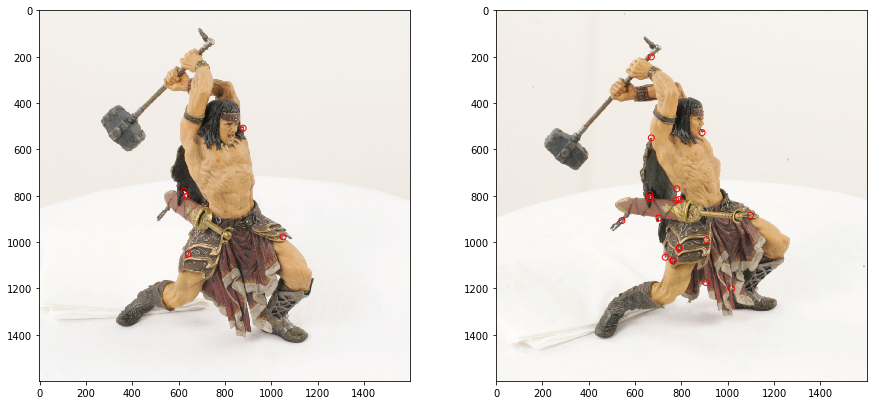

In [5]:
# detect corners on warrior and matrix image sets
# adjust your corner detection parameters here
nCorners = 20
qualityLevels = [0.01,0.1,0.2,0.3]
minDist = 2
#^ Upto you. Decide what works best. Show results for atleast 2
#levels.
imgs_mat = []
imgs_war = []
grayimgs_mat = []
grayimgs_war = []
# Read the two images and convert it to Greyscale
for i in range(2):
    img_mat = cv2.imread('p4/matrix/matrix' + str(i) + '.png')
    gray_mat = cv2.cvtColor(img_mat,cv2.COLOR_BGR2GRAY) 
    img_mat = cv2.cvtColor(img_mat,cv2.COLOR_BGR2RGB)
    imgs_mat.append(img_mat) 
    grayimgs_mat.append(gray_mat)
    # Comment above line and uncomment below line to
    # downsize your image in case corner_detect runs slow in test 
    #grayimgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    # if you unleash the power of numpy you wouldn't need to downsize, it'll be fast
    img_war = cv2.imread('p4/warrior/warrior' + str(i) + '.png')
    gray_war = cv2.cvtColor(img_war,cv2.COLOR_BGR2GRAY) 
    img_war = cv2.cvtColor(img_war,cv2.COLOR_BGR2RGB)
    imgs_war.append(img_war) 
    grayimgs_war.append(gray_war)
    
for qualLevel in qualityLevels:
    crns_mat = []
    crns_war = []
    print ("Quality Level:", qualLevel)
    for i in range(2):
        crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, qualLevel,\
                                      minDist))
        crns_war.append(corner_detect(grayimgs_war[i], nCorners, qualLevel,\
                                      minDist))
    show_corners_result(imgs_mat, crns_mat) #uncomment this to show your output!
    show_corners_result(imgs_war, crns_war)

### NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.
NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [6]:
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """
    Your code here:
    """
    
    window1 = img1[c1[0]-R:c1[0]+R+1, c1[1]-R:c1[1]+R+1]
    numerator1 = window1 - np.mean(window1)
    
    
    window2 = img2[c2[0]-R:c2[0]+R+1,c2[1]-R:c2[1]+R+1]
    numerator2 = window2 - np.mean(window2)
    
    dotted = numerator1 * numerator2
    
    matching_score = np.sum(dotted) / (np.std(window2)*len(window2)*np.std(window1)*len(window2))
    return matching_score

In [7]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print (ncc_match(img1, img2, np.array([1, 2]), np.array([1, 2]), 1))
# should print 0.8457
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 2]), 1))
# should print 0.6258

0.8546547739343037
0.8457615282174419
0.6258689611426175


### Naive Matching [5 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondances. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation. Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code. 
**Properly label or mention which output corresponds to which choice of number of corners. Total number of output is 6 images** (3 choice of number of corners for each matrix and warrior), where one image is like below:


Number of Corners: 10
<img src = "fig/dinoMatch.png" alt="dino match" width="800"/>

In [8]:
# You are free to modify code here, create your helper functions etc.
# detect corners on warrior and matrix sets
nCorners = 10 # Do this for 10, 20 and 30 corners
qualityLevels = 0.17 #Adjust to what you feel is the best
minDist = 15 #Adjust to what you feel is the best

crns_mat = []
crns_war = []
#Detect corners on the already read images
for i in range(2):
    crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, qualityLevels,\
                                      minDist))
    crns_war.append(corner_detect(grayimgs_war[i], nCorners, qualityLevels,\
                                      minDist))
    

In [9]:
def naive_matching(img1, img2, crnrs1, crnrs2, R, NCCth):
    matching = []
    flag = False
    for point1 in crnrs1:
        bestScore = NCCth
        for point2 in crnrs2:
            temp = ncc_match(img1, img2, point1.astype(int), point2.astype(int), R)
            if temp > bestScore:
                flag = True
                bestScore = temp
                best = (point1, point2)
        if flag:
            matching.append(best)
            flag = False
    return matching

In [10]:
# match corners
R = 15
NCCth = .8 # Put your threshold
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)

Number of Corners: 10


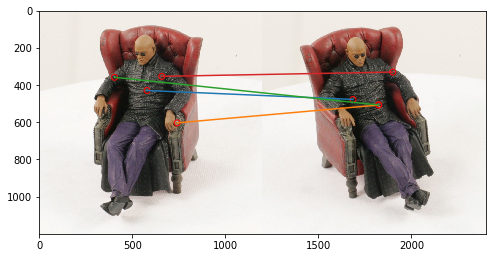

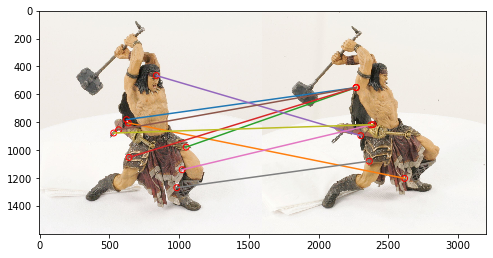

In [11]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig('dino_matching.png')
    plt.show()

# Uncomment to show output
print("Number of Corners:", nCorners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

## Epipolar Geometry [15 pts]

To continue our quest on furthering matching performance, we turn to epipolar geometry! The first step is to compute the Fundamental Matrix. Note that the Fundamental matrix is very similar to the Essential Matrix which you should be familiar about in class, however the Fundamental Matrix. does not require the camera to be calibrated (which is generally the case!)  
The code to compute the fundamental matrix is provided for you. Go through it and make sure the steps make sense to you.

In [12]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 

        Returns:
        Fundamental Matrix (3x3)

    """  
    A = np.array([x1[0,:]*x2[0,:],x1[0,:]*x2[1,:],x1[0,:]*x2[2,:],\
                  x1[1,:]*x2[0,:],x1[1,:]*x2[1,:],x1[1,:]*x2[2,:],\
                  x1[2,:]*x2[0,:],x1[2,:]*x2[1,:],x1[2,:]*x2[2,:]]).T
    _,_,vh = np.linalg.svd(A)
    F = vh[-1].reshape(3,3)
    u,sig,vh = np.linalg.svd(F)
    sig[2] = 0
    F = u@np.diag(sig)@vh
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    return F

def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]

### Plot Epipolar Lines [5 pts]
Using this fundamental matrix, plot the epipolar lines in both image pairs across all images. For this part you may want to complete the function <code>plot_epipolar_lines</code>. Shown your result for matrix and warrior as the figure below. 
![Dino Epipolar](fig/dinoEpi1.png)
![Dino Epipolar](fig/dinoEpi2.png)

Also, write the script to calculate the epipoles for a given Fundamental matrix and corner point correspondences in the two images.

In [83]:
import matplotlib.lines as mlines

def get_min_vector(F):
    
    values, vectors = np.linalg.eig(F)
    
    return vectors[:,np.argmin(values)]


def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix 
    and corner point correspondences
    input:
    F--> Fundamental matrix
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    #your code here
    
    e2 = get_min_vector(F)
    e1 = get_min_vector(F.T)
    
    return e1,e2

def to_euc(homPoint):
    homPoint = homPoint/homPoint[2]
    return homPoint[:2]

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

def plot_epipolar_lines(img1,img2, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    F = fundamental_matrix(cor1, cor2)
    he1, he2 = compute_epipole(F)
    e1 = to_euc(np.asarray(he1))
    e2 = to_euc(np.asarray(he2))
    fig = plt.figure(figsize=(8, 8))
    x1 = fig.add_subplot(321)
    x1.imshow(img1, cmap='gray')
    x1.scatter(cor1[0], cor1[1])
    for idx in range(np.size(cor2, 1)):
        lineEq = np.matmul(F, cor2[:,idx])
        yVal = -lineEq[2]/lineEq[1]
        newline(e1, [0,yVal])
    
    x2 = fig.add_subplot(322)
    x2.imshow(img2, cmap='gray')
    x2.scatter(cor2[0], cor2[1])
    
    for idx in range(np.size(cor1, 1)):
        lineEq = np.matmul(F.T, cor1[:,idx])
        yVal = -lineEq[2]/lineEq[1]
        newline(e2, [0,yVal])
    
    plt.show()
    
    """
    Your code here:
    """

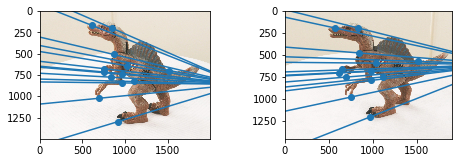

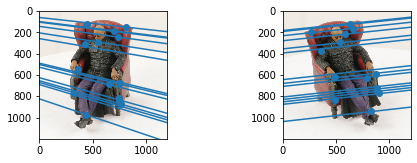

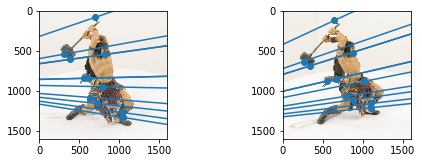

In [84]:
#Display the epipolar lines for the matched corners. No need to
#alter the below code. 
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    
    I1 = cv2.imread("./p4/"+imgid+"/"+imgid+"0.png") 
    I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)
    
    I2 = cv2.imread("./p4/"+imgid+"/"+imgid+"1.png") 
    I2 = cv2.cvtColor(I2,cv2.COLOR_BGR2RGB)
    
    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    plot_epipolar_lines(I1,I2,cor1,cor2)

### Image Rectification [5 pts]
 An interesting case for epipolar geometry occurs when two images are parallel to each other. In this case, there is no rotation component involved between the two images and the essential matrix is $\texttt{E}=[\boldsymbol{T_{x}}]\boldsymbol{R}=[\boldsymbol{T_{x}}]$. Also if you observe the epipolar lines $\boldsymbol{l}$ and $\boldsymbol{l^{'}}$ for parallel images, they are horizontal and consequently, the corresponding epipolar lines share the same vertical coordinate. Therefore the process of making images parallel becomes useful while discerning the relationships between corresponding points in images.
 Rectifying a pair of images can also be done for uncalibrated camera images (i.e. we do not require the camera matrix of intrinsic parameters). Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$.  Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. The method to find the homography has been implemented for you. You can read more about the method used to estimate the homography in the paper "Theory and Practice of Projective Rectification" by Richard Hartley.
 ![Image Rectification Setup](image_rectification.png)
 Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, find the rectified images and plot the parallel epipolar lines using the plot_epipolar_lines function from above. You need to do this for both the matrix and the warrior images. A sample output will look as below:
 ![sample rectification](Sample_rectification.png)

In [15]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix (Think about what you should be passing F or F.T!)
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new corner points as outputs for a given pair of 
    images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    outpu:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''
    "your code here"
    '''
    The steps you need to do are outlined as follows
    1) Get the F matrix by calling fundamental_matrix
    2) Compute the epipoles(pass F.T to the function)
    3) Call the compute matching homographies function passing
    in F.T (Think about this!), and the other required parameters.
    4)Based on that homography warp the source image to the target
    image
    5)Return the new corners in this image(DONT CALL CORNER DETECT AGAIN)
    along with the rectified images
    '''
    
    
    return rectified_im1,rectified_im2,new_cor1,new_cor2

### Matching Using epipolar geometry[5 pts]

We will now use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners
in Image1. Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
Evaluate the NCC score for each point along this line and return the best match (or no match if all
scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.  You do not
have to run this in both directions. Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).

In [16]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    
    """
    Your code here.
    You may refer to the show_matching_result function
    """

def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    """
    Your code here.
    """

In [17]:
I1 = cv2.imread("./p4/matrix/matrix0.png") 
I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)
    
I2 = cv2.imread("./p4/matrix/matrix1.png") 
I2 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)



cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")


I3 = cv2.imread("./p4/warrior/warrior0.png") 
I3 = cv2.cvtColor(I3,cv2.COLOR_BGR2RGB)
    
I4 = cv2.imread("./p4/warrior/warrior1.png") 
I4 = cv2.cvtColor(I4,cv2.COLOR_BGR2RGB)



cor3 = np.load("./p4/warrior/cor1.npy")
cor4 = np.load("./p4/warrior/cor2.npy")

# For matrix
rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
F_new = fundamental_matrix(new_cor1, new_cor2)

nCorners = 10
# Choose your threshold
NCCth = 0.7
#decide the NCC matching window radius
R = 10
# detect corners using corner detector here, store in corners1
corners1 = corner_detect(rectified_im1, nCorners, qualLevel, minDist)
corrs = correspondence_matching_epipole(rectified_im1, rectified_im2, corners1, F_new, R, NCCth)
display_correspondence(rectified_im1, rectified_im2, corrs)


# For warrior
rectified_im3,rectified_im4,new_cor3,new_cor4 = image_rectification(I3,I4,cor3,cor4)
F_new2=fundamental_matrix(new_cor3, new_cor4)
# You may wish to change your NCCth and R for warrior here.
corners2 = corner_detect(rectified_im3, nCorners, qualLevel, minDist)
corrs = correspondence_matching_epipole(rectified_im3, rectified_im4, corners2, F_new2, R, NCCth)
display_correspondence(rectified_im3, rectified_im4, corrs)

NameError: name 'rectified_im1' is not defined

## Problem 3: RANSAC for Estimating the Fundamental Matrix [15 pts]
We will now use SIFT to detect and match features, then use RANSAC to eliminate outliers that do not conform to a fundamental matrix model. For this problem, we are providing matched SIFT points in text files that you may simply read as input.

### Visualization of matching points [5 pts]
Use the provided matched SIFT points in the two images road1.png (leftimage) and road2.png (right image). Visualize the matched features by drawing lines between the left and right images. You may use the provided *show_matching_result* function. The data in points1.txt are the keypoints in the left image and the data in points2.txt are the keypoints in the right image. Each row has the x and y coordinates for a point. Corresponding rows in the two files are the matching points. Randomly visualize 20 matchings from all matched points.

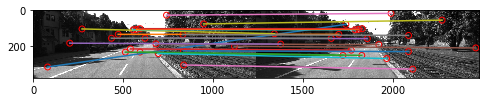

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def selector(x1, x2, num):
    
    merged_list = list(tuple(zip(x1, x2)))
    merged_list = [list(elem) for elem in merged_list]
    selected = []
    
    for i in range(num):
        selectedIdx = random.choice(range(len(merged_list)))
        selectedPair = merged_list[selectedIdx]
        selected.append((selectedIdx, selectedPair))
    
    return selected

randomNum = 20

x1 = np.loadtxt("points1.txt").T
x2 = np.loadtxt("points2.txt").T
roadimgs = []
for i in range(2):
    img = cv2.imread('road' + str(i+1) + '.png',0)
    roadimgs.append(img)
# Your code here
matching = selector(x1.T, x2.T, randomNum)
matchingPoints = [x[1] for x in matching]

show_matching_result(roadimgs[0], roadimgs[1], matchingPoints)

### RANSAC with 8-point algorithm [10 pts]
Use RANSAC with the 8-point algorithm to remove outliers and re-estimate the fundamental matrix with the inliers. Visualize the inlier matches by drawing lines between the left and right images. Plot the epipolar lines for 5 randomly selected keypoints.

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 20, 80, 91, 99, 100, 101, 102, 107, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 145, 146, 147, 148, 149, 150, 204, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 224, 225, 227, 228, 229, 231, 232, 233, 234, 265, 266, 268, 270, 271, 273, 274, 276, 278, 280, 281, 282, 283, 284, 285, 307, 308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 339, 341, 345, 356, 357, 367, 368, 369, 370, 371, 372, 378, 379, 381, 382, 383, 389]


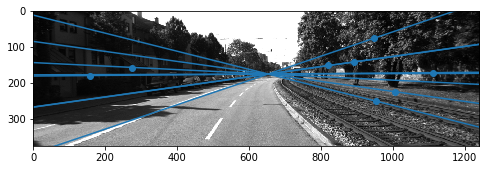

Number of inliers as iteration increases:


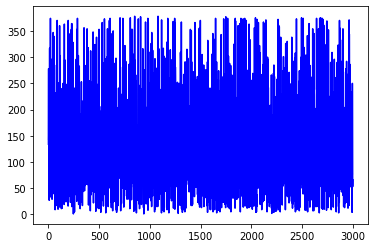

In [78]:
from tqdm import tqdm

def compute_fundamental_RANSAC(cor1, cor2, epiConstThres, nSample):
    """
    Input:
    - cor1, cor2: corners in image1 and image2
    - epiConstThres: Threshold for accepting inliers
    - nSample: number of iterations for RANSAC
    
    Output:
    - bestF: best fundamental matrix
    - bestInliersIdx: under bestF, the index of inliers of matching points
    - bestInliersNumList: record the best number of inliers so far at each iteration, with length nSample
    """
    """ YOUR CODE HERE !!!"""
    '''
    The steps for the procedure is as follows.
    1)Randomly select 8 matching pairs from the 2 sets of corners
    2)Call the function compute_fundamental to est the F matrix
    from these random 8 matching pairs.
    3)Evaluate the epipolar constraints for the points by evaluating
    the expression p'^TFp
    4)If this is lesser than epiConstThres add to inliers list
    5)Repeat the above steps nSamples number of times
    6)Return the bestF (one with highest inliers), the corr indices
    of the best inliers, and the number of inliers as a function of
    nSamples
    
    '''
    
    highestCount = 0
    inliers = []
    bestInliersNumList = []
    
    for i in range(nSample):
        theSelection = selector(cor1.T, cor2.T, 8)
        selectedPts = [x[1] for x in theSelection]
        selectedIdxs = [x[0] for x in theSelection]
        set1 = np.asarray([x for x,y in selectedPts])
        set2 = np.asarray([y for x,y in selectedPts])
        F = compute_fundamental(set1, set2)
        for i in range(cor1.shape[1]):
            testVal = np.matmul(cor2.T[i].T, np.matmul(F, cor1.T[i]))
            if testVal < epiConstThres:
                inliers.append((i, [cor1.T[i], cor2.T[i]]))
        bestInliersNumList.append(len(inliers))
        if len(inliers) > highestCount:
            bestInliersIdx = [x[0] for x in inliers]
            bestF = F
            highestCount = len(inliers)
        inliers = []

    theSelection = selector(cor1.T[bestInliersIdx], cor2.T[bestInliersIdx], 8)
    
    selectedPts = [x[1] for x in theSelection]
    set1 = np.asarray([x for x,y in selectedPts])
    set2 = np.asarray([y for x,y in selectedPts])
    F = compute_fundamental(set1, set2)
    
    inliers = []
    for i in range(cor1.shape[1]):
        testVal = np.matmul(cor2.T[i].T, np.matmul(F, cor1.T[i]))
        if testVal < epiConstThres:
            inliers.append((i, [cor1.T[i], cor2.T[i]]))
    
    bestInliersIdx = [x[0] for x in inliers]
    bestF = F
    
    return bestF, bestInliersIdx, bestInliersNumList

def fundamental_matrix_RANSAC(x1,x2, epiConstThres, nSample):
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    bestF, bestInliersIdx, bestInliersNumList = compute_fundamental_RANSAC(x1,x2,epiConstThres,nSample)
    
    # reverse normalization
    bestF = np.dot(T1.T,np.dot(bestF,T2))

    return bestF/bestF[2,2], bestInliersIdx, bestInliersNumList

def makeHomog(points):
    targetMat = np.ones((points.shape[0] + 1, points.shape[1]))
    targetMat[:-1,:] = points
    return targetMat

# calculating F using RANSAC
epiConstThres = 0.1
nSample = 3000
np.random.seed(10)

x1_h = makeHomog(x1)
x2_h = makeHomog(x2)

F, bestInliersIdx, bestInliersNumList = fundamental_matrix_RANSAC(x1_h, x2_h, epiConstThres, nSample)
print(bestInliersIdx)
inlierPts1 = x1_h[:,bestInliersIdx]
inlierPts2 = x2_h[:,bestInliersIdx]
chooseidx = np.random.choice(inlierPts1.shape[1], 8, replace=False)
plot_epipolar_lines(roadimgs[0], roadimgs[1], inlierPts1[:,chooseidx], inlierPts2[:,chooseidx])

print('Number of inliers as iteration increases:')
plt.plot(np.arange(len(bestInliersNumList)), bestInliersNumList, 'b-')

---
## Submission Instructions
Remember to submit a PDF version of this notebook to Gradescope. Please make sure the contents in each cell are clearly shown in your final PDF file.

There are multiple options for converting the notebook to PDF:
1. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX
2. You can first export as HTML and then convert to PDF